<a href="https://colab.research.google.com/github/menobleknight/using-python-for-research/blob/main/week-4-part-2/bird-migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

bird_data = pd.read_csv("https://raw.githubusercontent.com/menobleknight/using-python-for-research/main/week-4-part-2/bird-tracking.csv")

bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [6]:
bird_data.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


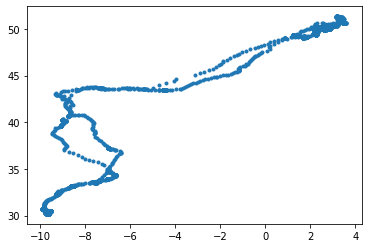

In [7]:
# plot longitude and latitude

import matplotlib.pyplot as plt
import numpy as np

# birds with name Eric
indices = (bird_data.bird_name == "Eric")

x, y = bird_data.longitude[indices], bird_data.latitude[indices]

plt.plot(x, y, ".");

In [8]:
bird_names = pd.unique(bird_data.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

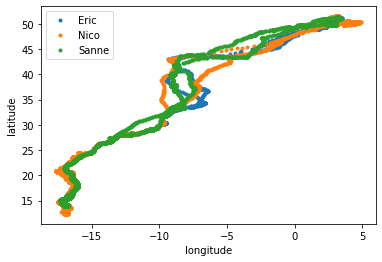

In [9]:
# plot longitudes and latitudes of all birds

for bird_name in bird_names:
    indices = (bird_data["bird_name"] == bird_name)
    x, y = bird_data.longitude[indices], bird_data.latitude[indices]
    plt.plot(x, y, ".")

plt.xlabel("longitude")
plt.ylabel("latitude")
plt.legend(bird_names);

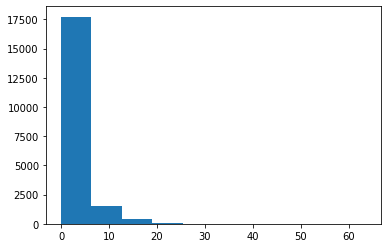

In [10]:
# speed of birds with name Eric

indices = bird_data.bird_name == "Eric"
speeds = bird_data.speed_2d[indices]
plt.hist(speeds);

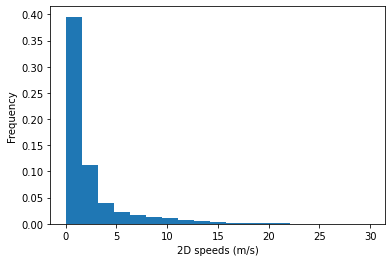

In [11]:
indices = bird_data.bird_name == "Eric"
speeds = bird_data.speed_2d[indices]
plt.hist(speeds, bins=np.linspace(0, 30 ,20), density=True)
plt.xlabel("2D speeds (m/s)")
plt.ylabel("Frequency");

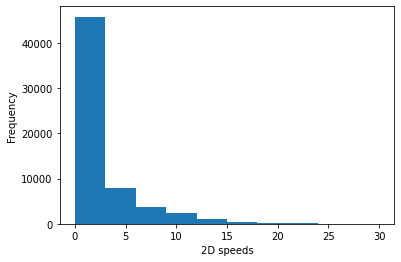

In [12]:
# plotting with pandas

bird_data.speed_2d.plot(kind="hist", range=[0, 30])
plt.xlabel("2D speeds");

In [13]:
# dealing with timestamped data using datetime module

bird_data.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [14]:
import datetime

datetime.datetime.today()

datetime.datetime(2021, 4, 18, 16, 15, 22, 284007)

In [15]:
# difference between two timestamps

time_1 = datetime.datetime.today()

In [16]:
time_2 = datetime.datetime.today()

In [17]:
time_2 - time_1

datetime.timedelta(microseconds=6000)

In [18]:
time_2 = datetime.datetime.today()

time_2 - time_1

datetime.timedelta(microseconds=19947)

In [19]:
date_str = bird_data.date_time[0]
type(date_str)

str

In [20]:
date_str

'2013-08-15 00:18:08+00'

In [21]:
date_str[:-3] # ignore '+00' i.e., UTC encoding, which is same for all timestamps

'2013-08-15 00:18:08'

In [22]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [23]:
timestamps = []
for k in range(len(bird_data)):
    timestamps.append(datetime.datetime.strptime(bird_data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

timestamps[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [24]:
# add new column to bird_data as "timestamp"

bird_data["timestamp"] = pd.Series(timestamps, index=bird_data.index)

In [25]:
bird_data.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [26]:
# arithmetic with timestamps

bird_data.timestamp[4] - bird_data.timestamp[3]

Timedelta('0 days 00:29:51')

In [28]:
# calculate time elapsed from the beginning of observation

times = bird_data.timestamp[bird_data.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

In [29]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [30]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [31]:
# check how many days have passed

elapsed_time[1000] / datetime.timedelta(days=1)

12.084722222222222

In [32]:
# check how many hours have passed

elapsed_time[1000] / datetime.timedelta(hours=1)

290.03333333333336

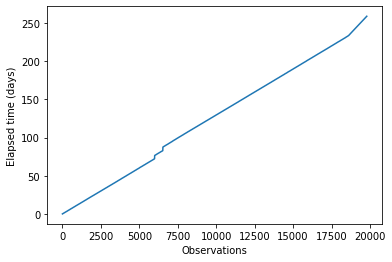

In [33]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observations")
plt.ylabel("Elapsed time (days)");